<a href="https://colab.research.google.com/github/cantaruttim/DesafioFieldPRO/blob/main/DesafioFieldPRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregamento dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Sensor_FieldPRO.csv')
dataset

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature
0,2020-09-30T23:00:00Z,38.0,31.366,9412,0,45123,30
1,2020-10-01T00:00:00Z,NaN,NaN,9412,0,45025,31
2,2020-10-01T01:00:00Z,39.0,31.366,9419,0,44923,31
3,2020-10-01T02:00:00Z,39.0,31.322,9419,0,44825,31
4,2020-10-01T03:00:00Z,38.0,31.240,9416,0,44728,31
...,...,...,...,...,...,...,...
1706,2020-12-11T09:00:00Z,82.0,19.480,9422,3,20669,17
1707,2020-12-11T10:00:00Z,69.0,24.000,9429,3,20606,19
1708,2020-12-11T11:00:00Z,63.0,25.440,9436,3,20529,25
1709,2020-12-11T12:00:00Z,60.0,27.160,9439,3,20442,28


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datetime – utc       1711 non-null   object 
 1   air_humidity_100     1705 non-null   float64
 2   air_temperature_100  1705 non-null   float64
 3   atm_pressure_main    1711 non-null   int64  
 4   num_of_resets        1711 non-null   int64  
 5   piezo_charge         1711 non-null   int64  
 6   piezo_temperature    1711 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 93.7+ KB


# Análise Exploratória dos Dados

## Tratando os dados Faltantes

In [4]:
# verificando os valores faltantes

dataset.isnull().sum()

Datetime – utc         0
air_humidity_100       6
air_temperature_100    6
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
dtype: int64

In [5]:
# Verificando a porcentagem dos valores faltantes

( dataset.isnull().sum() / len(dataset) ) * 100

Datetime – utc         0.000000
air_humidity_100       0.350672
air_temperature_100    0.350672
atm_pressure_main      0.000000
num_of_resets          0.000000
piezo_charge           0.000000
piezo_temperature      0.000000
dtype: float64

In [6]:
## filtrando os indices vazios
### Podemos observar que são os mesmos indices que estão com os valores faltantes. Vamos substituir os valores faltantes
### pela média de cada coluna
dataset[dataset['air_humidity_100'].isnull()]

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature
1,2020-10-01T00:00:00Z,NaN,NaN,9412,0,45025,31
6,2020-10-01T05:00:00Z,NaN,NaN,9411,0,44537,30
12,2020-10-01T12:00:00Z,NaN,NaN,9438,0,43874,30
16,2020-10-01T16:00:00Z,NaN,NaN,9460,0,43259,30
20,2020-10-01T21:00:00Z,NaN,NaN,9379,0,41914,37
30,2020-10-02T08:00:00Z,NaN,NaN,9398,0,41083,19


In [7]:
dataset[dataset['air_temperature_100'].isnull()]

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature
1,2020-10-01T00:00:00Z,NaN,NaN,9412,0,45025,31
6,2020-10-01T05:00:00Z,NaN,NaN,9411,0,44537,30
12,2020-10-01T12:00:00Z,NaN,NaN,9438,0,43874,30
16,2020-10-01T16:00:00Z,NaN,NaN,9460,0,43259,30
20,2020-10-01T21:00:00Z,NaN,NaN,9379,0,41914,37
30,2020-10-02T08:00:00Z,NaN,NaN,9398,0,41083,19


In [8]:
## ANÁLISE ESTATÍSTICA DESCRITIVA DOS DADOS
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
air_humidity_100,1705.0,60.238710,22.100228,13.00,41.0,61.00,80.0,99.000
air_temperature_100,1705.0,24.660940,6.174219,12.36,19.9,23.02,29.4,42.664
atm_pressure_main,1711.0,9432.838106,26.378333,9350.00,9416.0,9433.00,9450.0,9507.000
num_of_resets,1711.0,1.646406,1.090382,0.00,1.0,2.00,3.0,3.000
piezo_charge,1711.0,42462.030392,13038.238287,16950.00,32020.0,41765.00,53769.0,65533.000
piezo_temperature,1711.0,24.910579,8.374122,11.00,18.0,22.00,32.0,47.000


In [9]:
# Substituindo os valores faltantes com a média dos valores da coluna air_humidity_100
dataset['air_humidity_100'].fillna(
   60.238, inplace = True
)

In [10]:
dataset['air_temperature_100'].fillna(
   24.660, inplace = True
)

In [11]:
# Retiramos todos os valores faltantes
dataset.isnull().sum()

Datetime – utc         0
air_humidity_100       0
air_temperature_100    0
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
dtype: int64

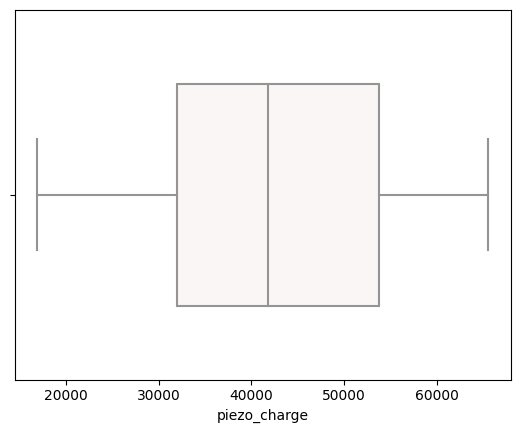

In [12]:
# BOXPLOT DA CARGA ACUMULADA

sns.boxplot(x="piezo_charge", data=dataset,
            whis=[0, 100], width=.6, palette="vlag");

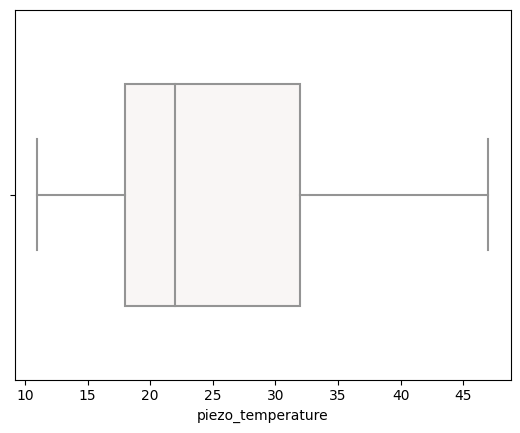

In [13]:
# BOXPLOT DA TEMPERATURA DO APARELHO

sns.boxplot(x="piezo_temperature", data=dataset,
            whis=[0, 100], width=.6, palette="vlag");

<ipython-input-14-0c46434f69f7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot = True);


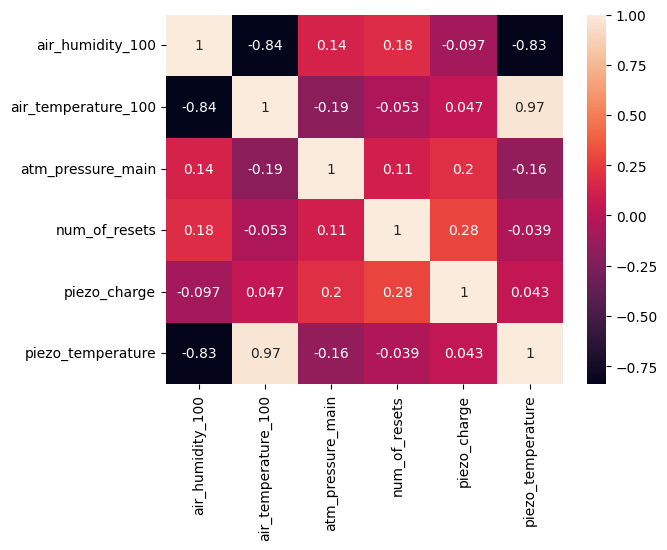

In [14]:
# Verificando a correlção entre as variáveis (importante porém não essencial para tomarmos informações)

sns.heatmap(dataset.corr(), annot = True);

In [15]:
## número de resets

np.unique(dataset['num_of_resets'], return_counts=True)

(array([0, 1, 2, 3]), array([301, 523, 367, 520]))

In [16]:
## número de cargas
### máxima e mínima
dataset['piezo_charge'].max(), dataset['piezo_charge'].min()

(65533, 16950)

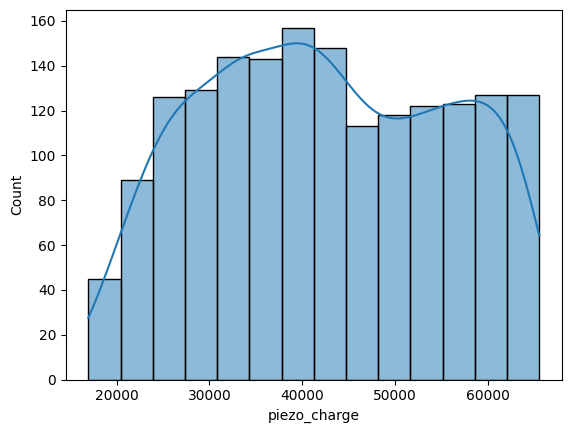

In [17]:
sns.histplot(dataset['piezo_charge'], kde = True);

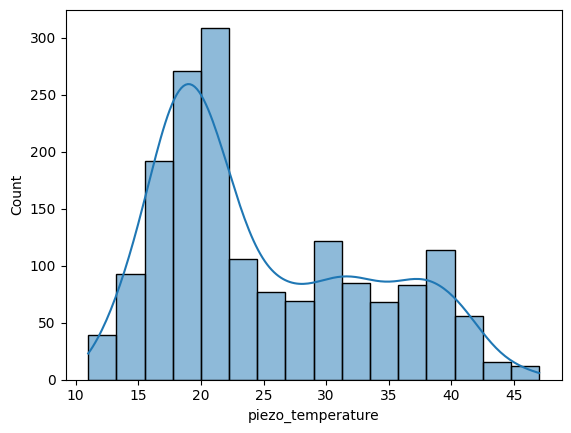

In [18]:
sns.histplot(dataset['piezo_temperature'], kde = True);

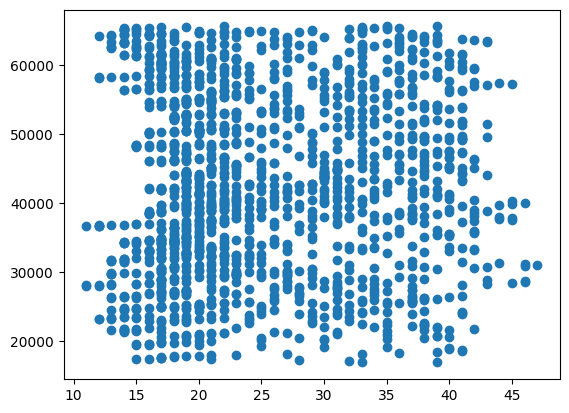

In [19]:
plt.scatter(x = dataset["piezo_temperature"], y = dataset["piezo_charge"]);

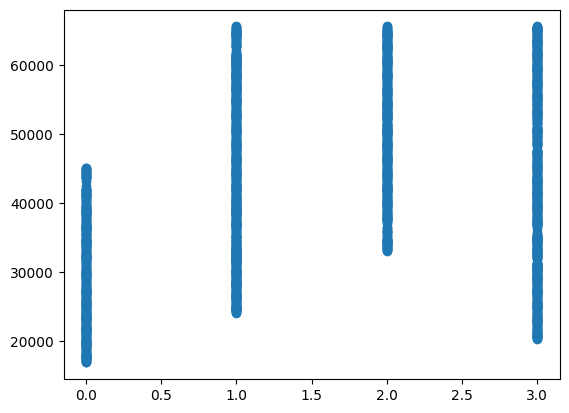

In [20]:
"""
Podemos observar com esse gráfico que ao aumentarmos o número de resets a quantidade de carga inicial coleta é afetada
Normalizando após 3 resets (possibilitando uma maior coleta de energia).
"""

plt.scatter(x = dataset["num_of_resets"], y = dataset["piezo_charge"]);

'\n  Observamos que ao chegar no pico, ocorre uma queda até próximo do valor mínimo\n\n'

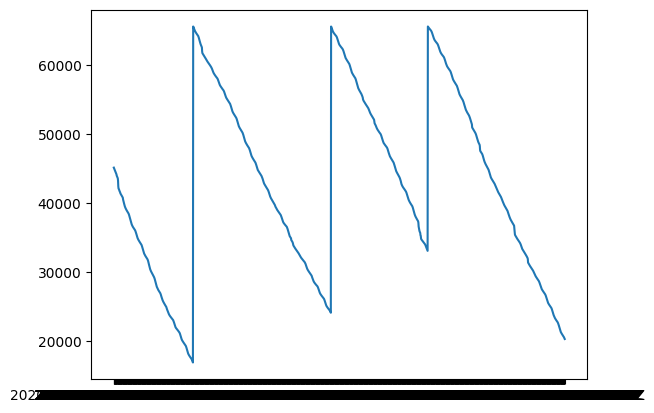

In [21]:
plt.plot(dataset['Datetime – utc'], dataset['piezo_charge']);

"""
  Observamos que ao chegar no pico, ocorre uma queda até próximo do valor mínimo

"""

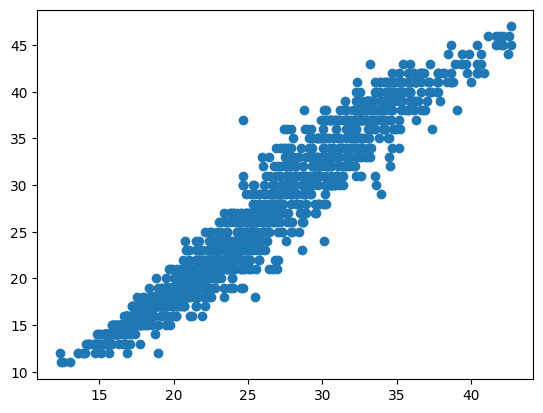

In [22]:
"""
Podemos observar que a temperatura externa influencia positivamente na temperatura do aparelho.
"""

plt.scatter(dataset['air_temperature_100'], dataset['piezo_temperature']);

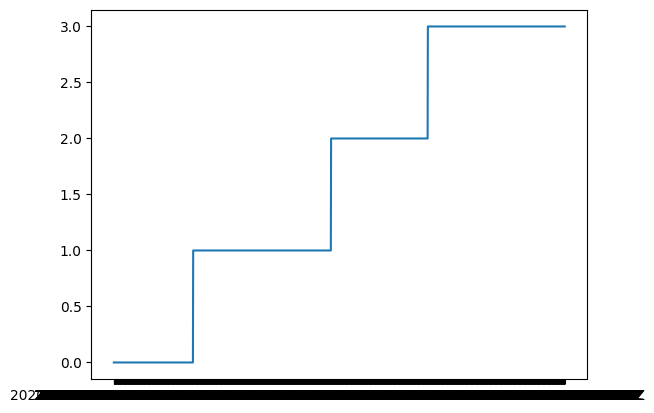

In [23]:
plt.plot(dataset['Datetime – utc'], dataset['num_of_resets']);

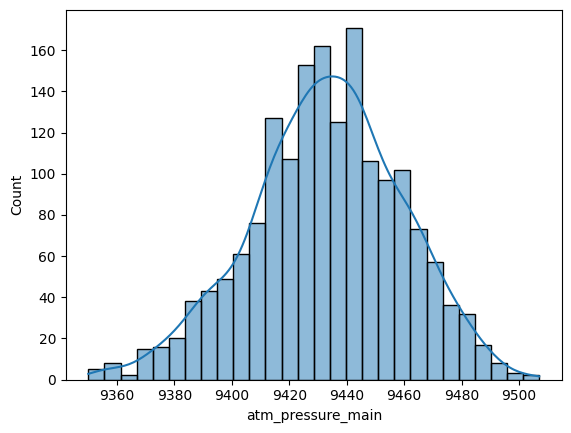

In [24]:
sns.histplot(dataset['atm_pressure_main'], kde = True);

In [25]:
X = dataset.iloc[:, 1:7].values
X

array([[3.8000e+01, 3.1366e+01, 9.4120e+03, 0.0000e+00, 4.5123e+04,
        3.0000e+01],
       [6.0238e+01, 2.4660e+01, 9.4120e+03, 0.0000e+00, 4.5025e+04,
        3.1000e+01],
       [3.9000e+01, 3.1366e+01, 9.4190e+03, 0.0000e+00, 4.4923e+04,
        3.1000e+01],
       ...,
       [6.3000e+01, 2.5440e+01, 9.4360e+03, 3.0000e+00, 2.0529e+04,
        2.5000e+01],
       [6.0000e+01, 2.7160e+01, 9.4390e+03, 3.0000e+00, 2.0442e+04,
        2.8000e+01],
       [5.6000e+01, 2.9060e+01, 9.4400e+03, 3.0000e+00, 2.0344e+04,
        3.0000e+01]])

# Agrupamento utilizando KMeans

In [26]:
# AGRUPAMENTO DOS DADOS

from sklearn.cluster import KMeans

In [27]:
## COMO OS DADOS NÃO ESTÃO ROTULADOS, VAMOS REALIZAR O AGRUPAMENTO POR MEIO DO KMeans
agrupamento = KMeans(n_clusters=2, random_state=1)
agrupamento.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=1)

In [28]:
agrupamento.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [29]:
# Criando a coluna Group utilizando o KMeans para a realização da calibração do modelo
## PODEMOS VERIFICAR A QUAL GRUPO CADA LINHA PERTECE POR MEIO DO .labels_ DO KMeans

dataset['Groups'] = agrupamento.labels_
dataset.head()

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,Groups
0,2020-09-30T23:00:00Z,38.000,31.366,9412,0,45123,30,0
1,2020-10-01T00:00:00Z,60.238,24.660,9412,0,45025,31,0
2,2020-10-01T01:00:00Z,39.000,31.366,9419,0,44923,31,0
3,2020-10-01T02:00:00Z,39.000,31.322,9419,0,44825,31,0
4,2020-10-01T03:00:00Z,38.000,31.240,9416,0,44728,31,0


In [30]:
## Podemos verificar que foram criados dois grupos. O Grupo 0 e o Grupo 1
np.unique(dataset['Groups'], return_counts=True)

(array([0, 1], dtype=int32), array([790, 921]))

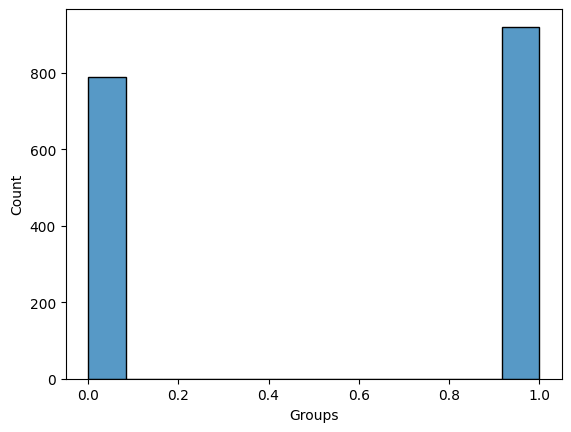

In [31]:
sns.histplot(dataset['Groups']);

In [32]:
y = dataset['Groups'].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

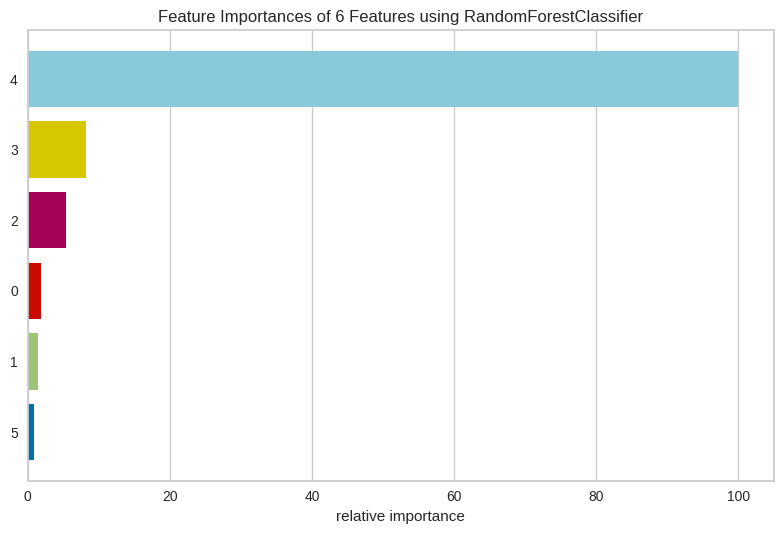

'\nPodemos observar que o número de resets da placa influencia muito. É a variável mais importante dos dados que possuímos.\nDepois vem a pressão atmosférica.\n'

In [33]:
## VAMOS VERIFICAR A IMPORTÂNCIA DAS VARIÁVEIS PARA ENTENDER MELHOR OS DADOS QUE POSSUÍMOS
"""
Para termos uma noção de qual variável é a mais importante ou as mais importantes vamos analisar o gráfico a seguir:
"""

from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

model = RandomForestClassifier(n_estimators=300)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

"""
Podemos observar que o número de resets da placa influencia muito. É a variável mais importante dos dados que possuímos.
Depois vem a pressão atmosférica.
"""

# Resultado da Classificação

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold

In [35]:
# X_res = pd.DataFrame(X_res)
# y_res = pd.DataFrame(y_res)

#### ********* ####

X = pd.DataFrame(X)
y = pd.DataFrame(y)

## _Classification Report_

In [36]:
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import TimeSeriesSplit

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


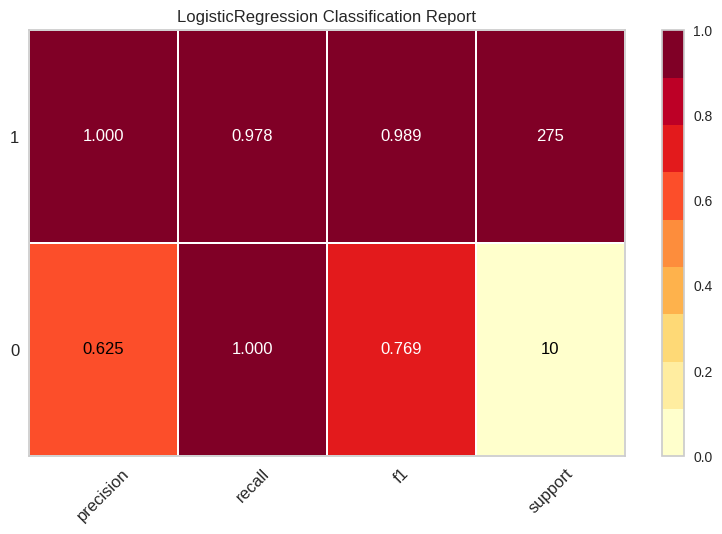

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [37]:
# Specify the target classes
classes = ["0", "1"]

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the classification model and visualizer
model = LogisticRegression()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


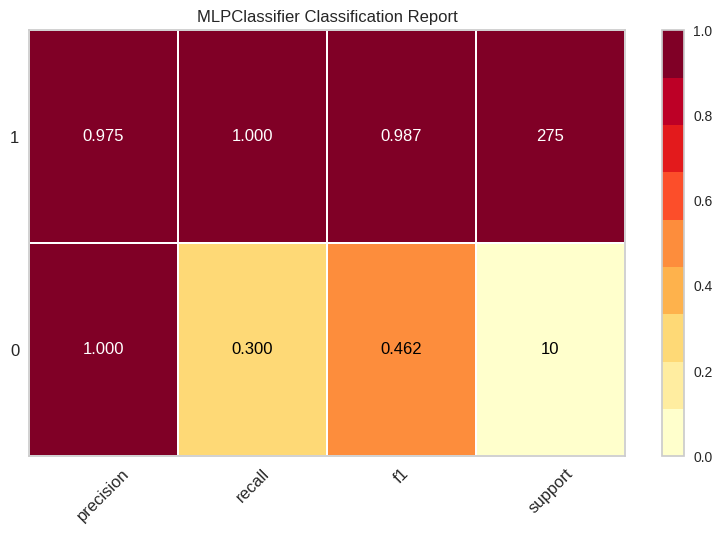

<Axes: title={'center': 'MLPClassifier Classification Report'}>

In [38]:
# Specify the target classes
classes = ["0", "1"]

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the classification model and visualizer
model = MLPClassifier()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

/usr/local/lib/python3.10/dist-packages/yellowbrick/base.py:390: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y, **kwargs)


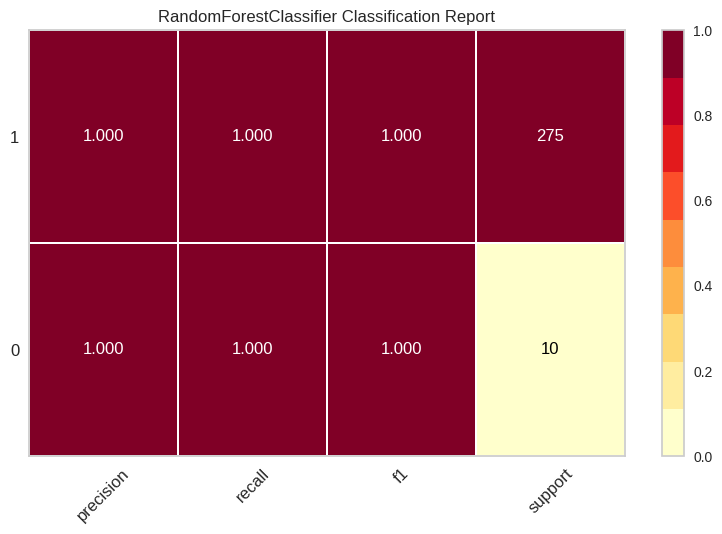

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [39]:
# Specify the target classes
classes = ["0", "1"]

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the classification model and visualizer
model = RandomForestClassifier()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

# Teste de Hipótese - Machine Learning

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold

In [41]:
## Podemos tratar o desbalanceamento dos dados
### Por meio da técnica SMOTE podemos "sintetizar" os dados que estão em menor quantidade
### e deixar a base balanceada

from collections import Counter
from imblearn.over_sampling import SMOTE

print('Original dataset shape %s' % Counter(y))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 1})
Resampled dataset shape Counter({0: 1})


In [42]:
resultados_naive_cv = []
resultados_logistica_cv = []
resultados_forest_cv = []
resultados_redeNeural_cv = []

for i in range(30):
  kfold = KFold(n_splits = 10, shuffle = True, random_state = i)

  naive_bayes = GaussianNB()
  scores = cross_val_score(naive_bayes, X_res, y_res, cv = kfold)
  resultados_naive_cv.append(scores.mean())

  logistica = LogisticRegression()
  scores = cross_val_score(logistica, X_res, y_res, cv = kfold)
  resultados_logistica_cv.append(scores.mean())

  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, X_res, y_res, cv = kfold)
  resultados_forest_cv.append(scores.mean())

  rede_neural = MLPClassifier()
  scores = cross_val_score(rede_neural, X_res, y_res, cv = kfold)
  resultados_redeNeural_cv.append(scores.mean())

resultados_naive_cv = np.array(resultados_naive_cv)
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_forest_cv = np.array(resultados_forest_cv)
resultados_redeNeural_cv = np.array(resultados_redeNeural_cv)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [43]:
## RESULTADOS

print(

    print("Resultados Naive: ", np.max(resultados_naive_cv) * 100),
    print("Resultados Regressão Logística: ", np.max(resultados_logistica_cv) * 100),
    print("Resultado Random Forest: ", np.max(resultados_forest_cv) * 100),
    print("Resultado Rede Neural: ", np.max(resultados_redeNeural_cv) * 100) ,
)

Resultados Naive:  96.63484136310223
Resultados Regressão Logística:  99.891598119859
Resultado Random Forest:  100.0
Resultado Rede Neural:  99.62015276145712
None None None None


Todos os algortimos apresentaram resultados muito promissores para que pudessemos avaliar a classificação do nosso modelo. Porem vamos verificar agora com teste de hipótese e selecionar qual o melhor algoritmo para que possamos implementar no nosso modelo.

## Teste de Hipótese - Shapiro-Wilk

In [44]:
from scipy.stats import shapiro

shapiro(resultados_naive_cv), shapiro(resultados_logistica_cv), shapiro(resultados_forest_cv), shapiro(resultados_redeNeural_cv)

(ShapiroResult(statistic=0.9198727011680603, pvalue=0.026617681607604027),
 ShapiroResult(statistic=0.7376576662063599, pvalue=5.78905246584327e-06),
 ShapiroResult(statistic=0.553987979888916, pvalue=2.094275508568444e-08),
 ShapiroResult(statistic=0.954024612903595, pvalue=0.2164115309715271))

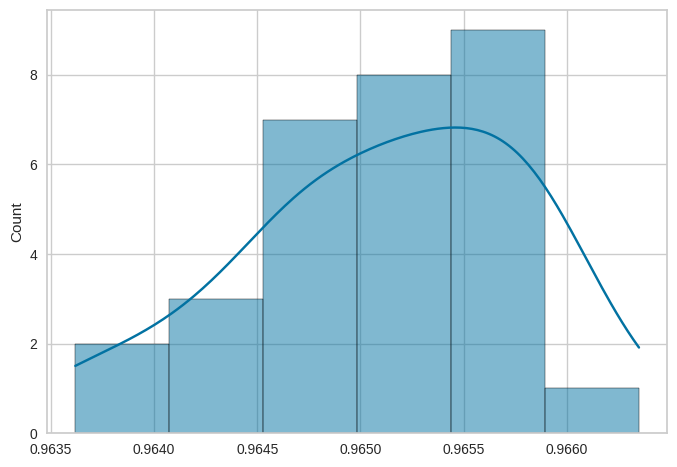

In [45]:
sns.histplot(resultados_naive_cv, kde = True);

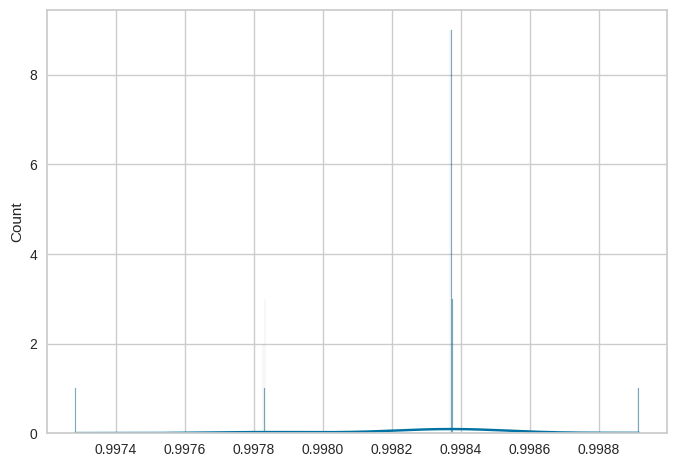

In [46]:
sns.histplot(resultados_logistica_cv, kde = True);

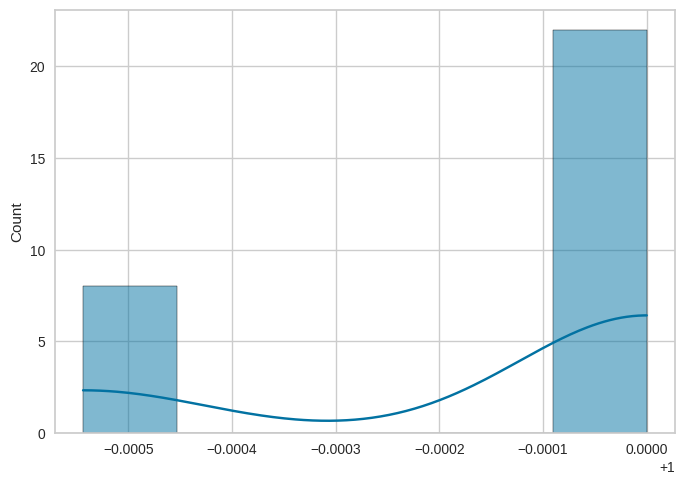

In [47]:
sns.histplot(resultados_forest_cv, kde = True);

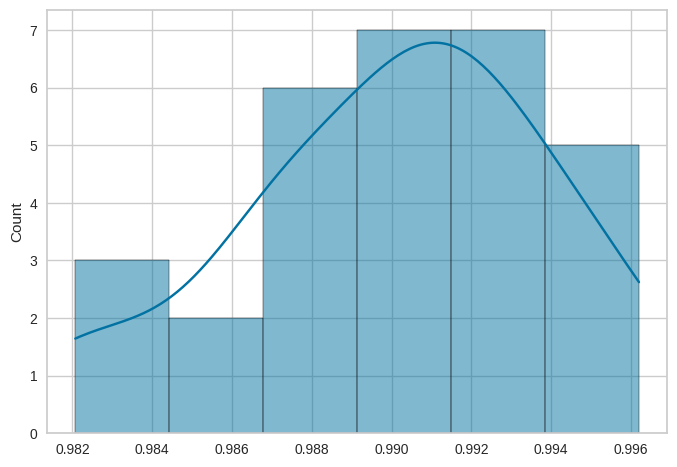

In [48]:
sns.histplot(resultados_redeNeural_cv, kde = True);

## Teste de Hipótese - ANOVA e Tukey algoritmos

In [49]:
from scipy.stats import f_oneway

_, p = f_oneway(resultados_naive_cv, resultados_logistica_cv, resultados_forest_cv, resultados_redeNeural_cv)
p

2.6467289020859703e-99

In [50]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada. Dados são diferentes


In [51]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_naive_cv, resultados_logistica_cv, resultados_forest_cv, resultados_redeNeural_cv]),
                         'algoritmo': ['naive', 'naive','naive','naive','naive','naive','naive','naive','naive','naive',
                                       'naive', 'naive','naive','naive','naive','naive','naive','naive','naive','naive',
                                       'naive', 'naive','naive','naive','naive','naive','naive','naive','naive','naive',
                                       'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
                                       'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
                                       'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
                                       'forest','forest','forest','forest','forest','forest','forest','forest','forest','forest',
                                       'forest','forest','forest','forest','forest','forest','forest','forest','forest','forest',
                                       'forest','forest','forest','forest','forest','forest','forest','forest','forest','forest',
                                       'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural,', 'rede_neural',
                                       'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural',
                                       'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural'] }

In [52]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.964175,naive
1,0.964175,naive
2,0.965264,naive
3,0.965799,naive
4,0.963619,naive
...,...,...
115,0.994039,rede_neural
116,0.990787,rede_neural
117,0.991857,rede_neural
118,0.991848,rede_neural


In [53]:
from statsmodels.stats.multicomp import MultiComparison

compara_grupos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])
teste = compara_grupos.tukeyhsd()
print(teste)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower   upper  reject
---------------------------------------------------------------
     forest     logistic  -0.0016 0.0201  -0.003 -0.0002   True
     forest        naive  -0.0347    0.0 -0.0362 -0.0333   True
     forest  rede_neural  -0.0099    0.0 -0.0113 -0.0084   True
     forest rede_neural,  -0.0091 0.0002 -0.0147 -0.0035   True
   logistic        naive  -0.0332    0.0 -0.0346 -0.0317   True
   logistic  rede_neural  -0.0083    0.0 -0.0097 -0.0068   True
   logistic rede_neural,  -0.0075  0.003 -0.0131 -0.0019   True
      naive  rede_neural   0.0249    0.0  0.0234  0.0263   True
      naive rede_neural,   0.0257    0.0  0.0201  0.0313   True
rede_neural rede_neural,   0.0008 0.9951 -0.0048  0.0064  False
---------------------------------------------------------------


Observamos que de todos os algoritmos utilizados apenas as redes neurais apresentaram resultados promissores quanto a classificação do nosso aparelho. Podemos observar que apenas as redes neurais apresentaram um valor de `p` acima de 0.05. Ou seja poderíamos rejeitar a Hipótese Nula e dizermos que os resultados originados do `KFold` foram estatisticamente significante e diferentes. Podemos observar pelos valores de `lower` e `upper` apresentados pela tabela acima.

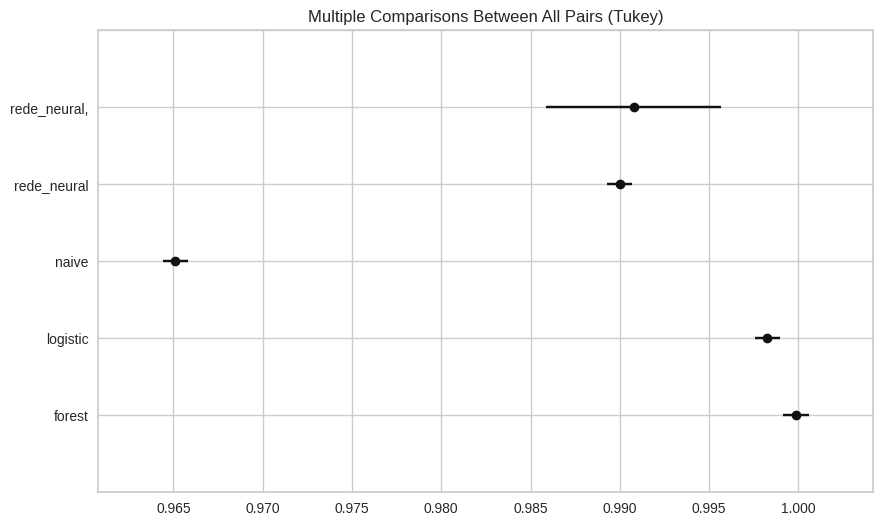

In [54]:
teste.plot_simultaneous();